In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
aisles = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\aisles.csv')
depts = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\departments.csv')
orders = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\orders.csv')
products = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\products.csv')
product_orders_train = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\order_products__train.csv')
product_orders_prior = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\order_products__prior.csv')

In [3]:
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
print(products.shape)
products.head(5)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
print(aisles.shape)
aisles.head(5)

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
print(depts.shape)
depts.head(5)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
print(product_orders_train.shape)
product_orders_train.head(5)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
print(product_orders_prior.shape)
product_orders_prior.head(5)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### Pre-processing the datasets

In [9]:
# Analysing the 'orders' dataset
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


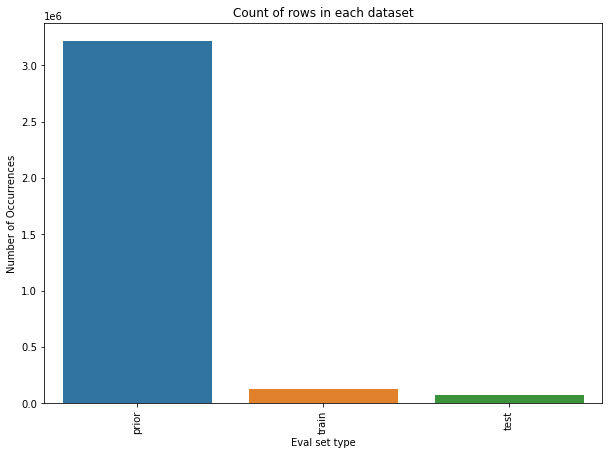

In [10]:
# "eval_set" tells us as to which of the three datasets (prior, train or test) a row belongs
cnt_srs = orders['eval_set'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Eval set type')
plt.title('Count of rows in each dataset')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

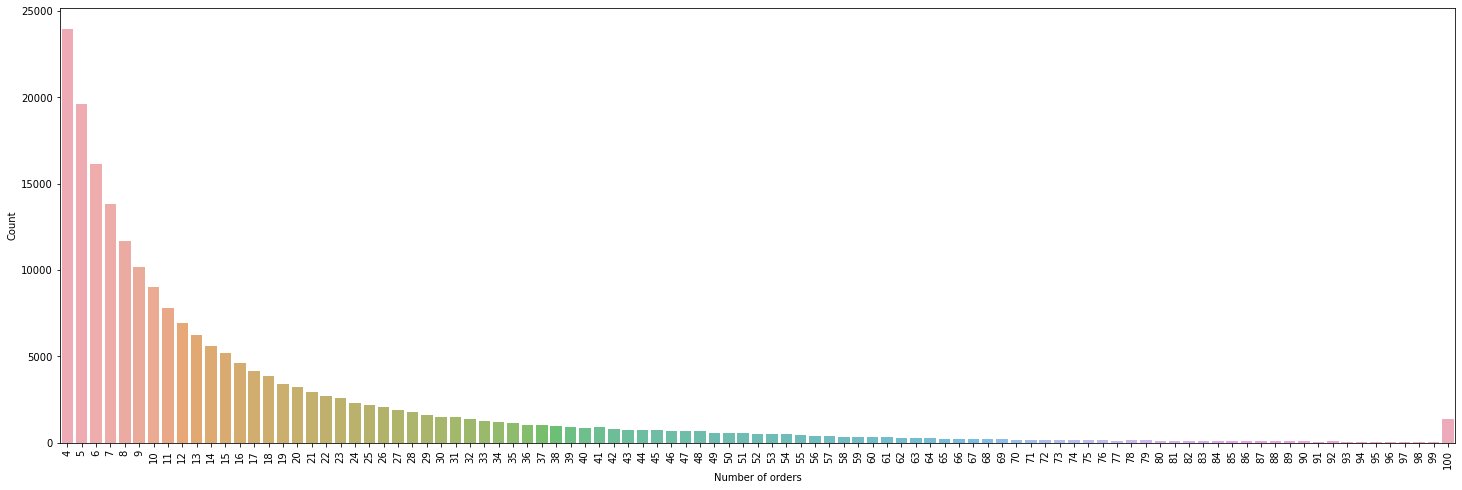

In [12]:
#  4-100 orders per customer are given in the dataset
count = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count = count.order_number.value_counts()

plt.figure(figsize=(25,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.xlabel('Number of orders')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
# Renaming the 'order_dow' column
orders = orders.rename({'order_dow': 'order_day'}, axis='columns')
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_day,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
# Drop the unnecessary columns
orders = orders.drop(['eval_set'], axis='columns')
print(orders.shape)
orders.head(5)

(3421083, 6)


,order_id,user_id,order_number,order_day,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [15]:
orders.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_day                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [16]:
# There are 206209 missing values in 'days_since_prior_order', so filling it with mean
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(orders['days_since_prior_order'].mean())

In [17]:
orders['days_since_prior_order'].unique()

array([11.11483623, 15.        , 21.        , 29.        , 28.        ,
       19.        , 20.        , 14.        ,  0.        , 30.        ,
       10.        ,  3.        ,  8.        , 13.        , 27.        ,
        6.        ,  9.        , 12.        ,  7.        , 17.        ,
       11.        , 22.        ,  4.        ,  5.        ,  2.        ,
       23.        , 26.        , 25.        , 16.        ,  1.        ,
       18.        , 24.        ])

In [18]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int)

In [19]:
orders['days_since_prior_order'].unique()

array([11, 15, 21, 29, 28, 19, 20, 14,  0, 30, 10,  3,  8, 13, 27,  6,  9,
       12,  7, 17, 22,  4,  5,  2, 23, 26, 25, 16,  1, 18, 24])

In [20]:
orders.head(5)

,order_id,user_id,order_number,order_day,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,11
1,2398795,1,2,3,7,15
2,473747,1,3,3,12,21
3,2254736,1,4,4,7,29
4,431534,1,5,4,15,28


In [21]:
# Let's check if any more missing values present
orders.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_day                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

#### Merging the 'products', 'depts' and 'aisles' dataset

In [22]:
# merging the 'depts' & 'products' datasets to get the dept_name
prod_details = pd.merge(products, depts, on='department_id', how='left')
print(prod_details.shape)
prod_details.head(5)

(49688, 5)


,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [23]:
# merging it with the 'aisles' datasets to get the aisle_name
product_details = pd.merge(prod_details, aisles, on='aisle_id', how='left')
print(product_details.shape)
product_details.head(5)

(49688, 6)


,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [24]:
# Re-ordering the columns
product_details = product_details.reindex(columns=['product_id', 'product_name', 'department_id', 'department',
                                                   'aisle_id', 'aisle'])
product_details.head(5)


,product_id,product_name,department_id,department,aisle_id,aisle
0,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes
1,2,All-Seasons Salt,13,pantry,104,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,7,beverages,94,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,1,frozen,38,frozen meals
4,5,Green Chile Anytime Sauce,13,pantry,5,marinades meat preparation


In [25]:
# Let's check if any missing values present
product_details.isnull().sum()

product_id       0
product_name     0
department_id    0
department       0
aisle_id         0
aisle            0
dtype: int64

#### Merging the 'product_orders_train' with the 'product_details' dataset

In [26]:
# merging the 'product_orders' & 'product_details' datasets to get additional info.
merged_df = pd.merge(product_details, product_orders_train, on='product_id', how='inner')
print(merged_df.shape)
merged_df.head(5)

(1384617, 9)


,product_id,product_name,department_id,department,aisle_id,aisle,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,6695,7,1
1,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,48361,9,0
2,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,63770,4,0
3,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,75339,9,0
4,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,240996,3,1


In [27]:
# Let's check if any missing values present
merged_df.isnull().sum()

product_id           0
product_name         0
department_id        0
department           0
aisle_id             0
aisle                0
order_id             0
add_to_cart_order    0
reordered            0
dtype: int64

#### Merging with the 'orders' dataset to get the final dataset

In [28]:
# merging to get the final dataset
new_df = pd.merge(merged_df, orders, on='order_id', how='inner')
print(new_df.shape)
new_df.head(5)

(1384617, 14)


,product_id,product_name,department_id,department,aisle_id,aisle,order_id,add_to_cart_order,reordered,user_id,order_number,order_day,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,6695,7,1,1540,29,1,1,8
1,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,1,frozen,37,ice cream ice,6695,14,1,1540,29,1,1,8
2,3298,Mozzarella String Cheese,16,dairy eggs,21,packaged cheese,6695,13,1,1540,29,1,1,8
3,6184,Clementines,4,produce,32,packaged produce,6695,19,1,1540,29,1,1,8
4,9007,Frosted Flakes,14,breakfast,121,cereal,6695,9,1,1540,29,1,1,8


In [29]:
# Let's check if any missing values present
new_df.isnull().sum()

product_id                0
product_name              0
department_id             0
department                0
aisle_id                  0
aisle                     0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
order_number              0
order_day                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [30]:
# Re-ordering the columns
new_df = new_df.reindex(columns=['user_id', 'order_id', 'order_number', 'product_id', 'product_name', 'department_id', 
                                 'department', 'aisle_id', 'aisle', 'order_day', 'order_hour_of_day', 
                                 'days_since_prior_order', 'add_to_cart_order', 'reordered'])
print(new_df.shape)
new_df.head(5)

(1384617, 14)


,user_id,order_id,order_number,product_id,product_name,department_id,department,aisle_id,aisle,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,1540,6695,29,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,1,8,7,1
1,1540,6695,29,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,1,frozen,37,ice cream ice,1,1,8,14,1
2,1540,6695,29,3298,Mozzarella String Cheese,16,dairy eggs,21,packaged cheese,1,1,8,13,1
3,1540,6695,29,6184,Clementines,4,produce,32,packaged produce,1,1,8,19,1
4,1540,6695,29,9007,Frosted Flakes,14,breakfast,121,cereal,1,1,8,9,1


### Feature Engineering

##### Adding a new 'product_reorder_rate' column

In [31]:
# Get the 'reorder_rate' for each product, i.e., how frequently the product was reordered regardless the user preference?
# reorder_rate = reorders / total orders
df = pd.DataFrame({'product_reorder_rate': new_df.groupby(['product_id','reordered'])['reordered'].count().groupby(['product_id']).apply(lambda x: x / float(x.sum()))}).reset_index()
print(df.shape)
df.head(5)

(65183, 3)


,product_id,reordered,product_reorder_rate
0,1,0,0.355263
1,1,1,0.644737
2,2,0,0.750000
3,2,1,0.250000
4,3,1,1.000000


In [32]:
# get data of reordered products only
df[df['reordered']==1]

,product_id,reordered,product_reorder_rate
1,1,1,0.644737
3,2,1,0.250000
4,3,1,1.000000
6,4,1,0.636364
7,5,1,1.000000
...,...,...,...
65172,49680,1,0.282609
65174,49681,1,0.625000
65177,49683,1,0.708247
65179,49686,1,0.714286


In [33]:
# get data for products which were never reordered
df[(df['reordered']==0) & (df['product_reorder_rate']==float(1.0))]

,product_id,reordered,product_reorder_rate
19,13,0,1.0
20,14,0,1.0
21,15,0,1.0
22,16,0,1.0
25,21,0,1.0
...,...,...,...
65142,49653,0,1.0
65145,49658,0,1.0
65146,49659,0,1.0
65175,49682,0,1.0


In [34]:
# handling such products, since never reordered so reorder_rate = 0.0
df.loc[((df['reordered']==0) & (df['product_reorder_rate']==float(1.0))), 'product_reorder_rate'] = 0.0
df.head(5)

,product_id,reordered,product_reorder_rate
0,1,0,0.355263
1,1,1,0.644737
2,2,0,0.750000
3,2,1,0.250000
4,3,1,1.000000


In [35]:
# merging it with the 'new_df' dataset
sales = pd.merge(new_df, df, on=['product_id', 'reordered'], how='inner')
print(sales.shape)
sales.head(5)

(1384617, 15)


,user_id,order_id,order_number,product_id,product_name,department_id,department,aisle_id,aisle,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_reorder_rate
0,1540,6695,29,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,1,8,7,1,0.644737
1,57938,240996,49,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,4,11,21,3,1,0.644737
2,21054,253400,4,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,3,14,30,4,1,0.644737
3,66968,273262,18,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,6,10,18,1,1,0.644737
4,54868,298510,5,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,3,12,14,1,1,0.644737


##### Adding a new 'user_reorder_rate' column

In [36]:
# Get the 'reorder_rate' for each user, i.e., what is the reorder rate on orders placed by a user?
# reorder_rate = reorders / total orders
user_df = pd.DataFrame({'user_reorder_rate': new_df.groupby(['user_id','reordered'])['reordered'].count().groupby(['user_id']).apply(lambda x: x / float(x.sum()))}).reset_index()
print(user_df.shape)
user_df.head(5)

(229615, 3)


,user_id,reordered,user_reorder_rate
0,1,0,0.090909
1,1,1,0.909091
2,2,0,0.612903
3,2,1,0.387097
4,5,0,0.555556


In [37]:
# get data of reordered users only
user_df[user_df['reordered']==1]

,user_id,reordered,user_reorder_rate
1,1,1,0.909091
3,2,1,0.387097
5,5,1,0.444444
7,7,1,0.888889
9,8,1,0.222222
...,...,...,...
229606,206199,1,0.636364
229608,206200,1,0.578947
229610,206203,1,0.923077
229612,206205,1,0.315789


In [38]:
# get data for users who never reordered
user_df[(user_df['reordered']==0) & (user_df['user_reorder_rate']==float(1.0))]

,user_id,reordered,user_reorder_rate
11,10,0,1.0
41,44,0,1.0
43,47,0,1.0
100,93,0,1.0
125,112,0,1.0
...,...,...,...
229485,206100,0,1.0
229503,206114,0,1.0
229509,206121,0,1.0
229587,206184,0,1.0


In [39]:
# handling such users, since never reordered so reorder_rate = 0.0
user_df.loc[((user_df['reordered']==0) & (user_df['user_reorder_rate']==float(1.0))), 'user_reorder_rate'] = 0.0
user_df.head(5)

,user_id,reordered,user_reorder_rate
0,1,0,0.090909
1,1,1,0.909091
2,2,0,0.612903
3,2,1,0.387097
4,5,0,0.555556


In [40]:
user_df[(user_df['reordered']==0) & (user_df['user_reorder_rate']==float(1.0))]

,user_id,reordered,user_reorder_rate


In [41]:
# merging it with the 'sales' dataset
sales_df = pd.merge(sales, user_df, on=['user_id', 'reordered'], how='inner')
print(sales_df.shape)
sales_df.head(5)

(1384617, 16)


,user_id,order_id,order_number,product_id,product_name,department_id,department,aisle_id,aisle,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_reorder_rate,user_reorder_rate
0,1540,6695,29,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes,1,1,8,7,1,0.644737,1.0
1,1540,6695,29,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,1,frozen,37,ice cream ice,1,1,8,14,1,0.680000,1.0
2,1540,6695,29,3298,Mozzarella String Cheese,16,dairy eggs,21,packaged cheese,1,1,8,13,1,0.731707,1.0
3,1540,6695,29,6184,Clementines,4,produce,32,packaged produce,1,1,8,19,1,0.743153,1.0
4,1540,6695,29,9007,Frosted Flakes,14,breakfast,121,cereal,1,1,8,9,1,0.608696,1.0


In [42]:
# Re-ordering the columns
sales_df=sales_df.reindex(columns=['user_id','order_id','order_number','product_id','product_name','product_reorder_rate',
                                   'department_id','department','aisle_id','aisle','order_day','order_hour_of_day',
                                   'days_since_prior_order', 'add_to_cart_order','user_reorder_rate','reordered'])
print(sales_df.shape)
sales_df.head(5)

(1384617, 16)


,user_id,order_id,order_number,product_id,product_name,product_reorder_rate,department_id,department,aisle_id,aisle,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,user_reorder_rate,reordered
0,1540,6695,29,1,Chocolate Sandwich Cookies,0.644737,19,snacks,61,cookies cakes,1,1,8,7,1.0,1
1,1540,6695,29,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,0.680000,1,frozen,37,ice cream ice,1,1,8,14,1.0,1
2,1540,6695,29,3298,Mozzarella String Cheese,0.731707,16,dairy eggs,21,packaged cheese,1,1,8,13,1.0,1
3,1540,6695,29,6184,Clementines,0.743153,4,produce,32,packaged produce,1,1,8,19,1.0,1
4,1540,6695,29,9007,Frosted Flakes,0.608696,14,breakfast,121,cereal,1,1,8,9,1.0,1


### Exploratory Analysis

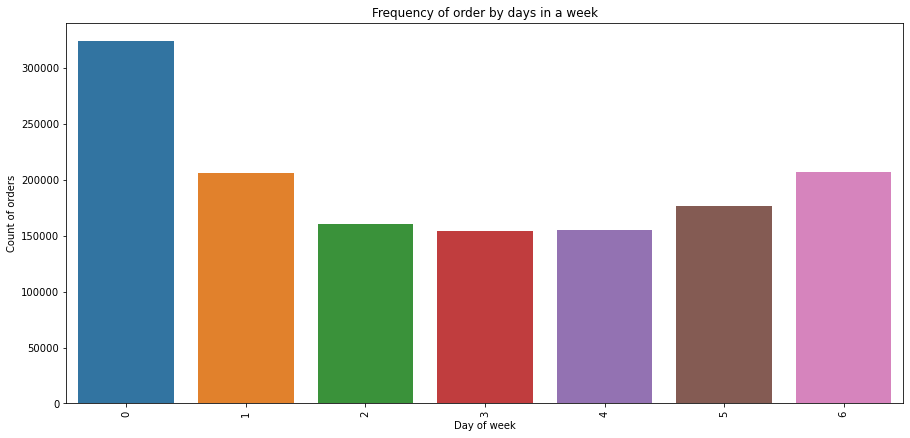

In [43]:
# visualise the order changes with each day of week
# 0->Saturday and 1->Sunday when the orders are highest and lowest during 4->Wednesday
plt.figure(figsize=(15,7))
sns.countplot(x="order_day", data=sales_df)
plt.ylabel('Count of orders')
plt.xlabel('Day of week')
plt.xticks(rotation='vertical')
plt.title("Frequency of order by days in a week")
plt.show()

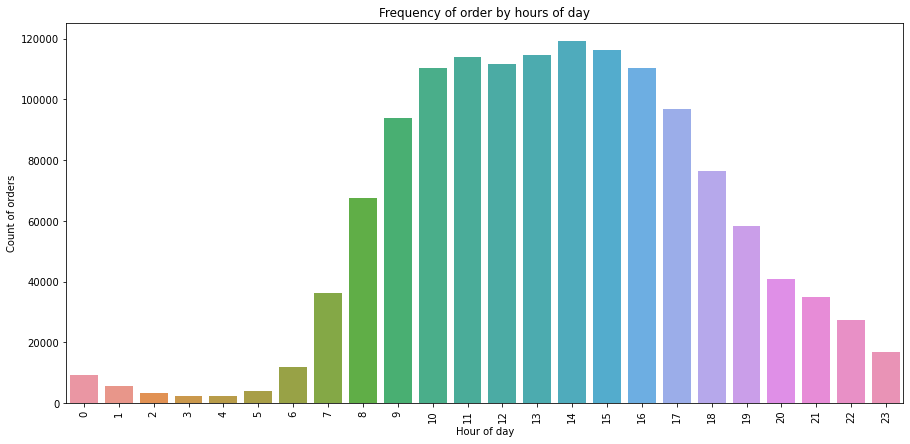

In [44]:
# visualise the order changes with hours of a day
# majority of the orders are made during day time, i.e., from 10am->6pm
plt.figure(figsize=(15,7))
sns.countplot(x="order_hour_of_day", data=sales_df)
plt.ylabel('Count of orders')
plt.xlabel('Hour of day')
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hours of day")
plt.show()

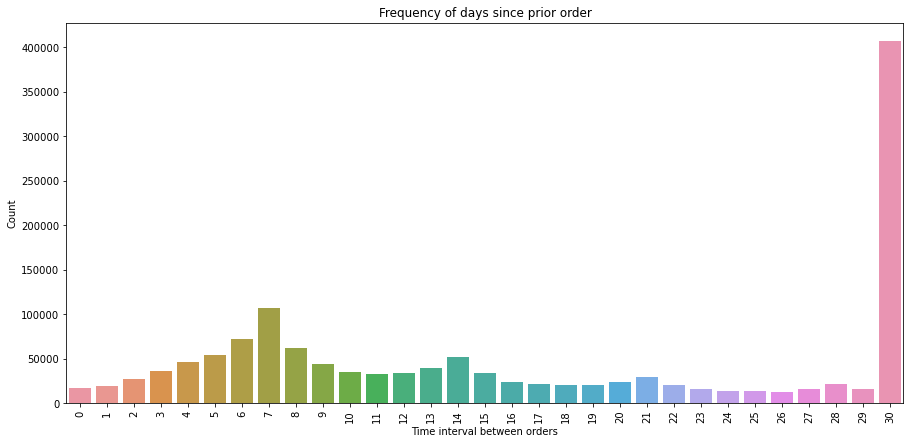

In [45]:
# visualise the time-interval between the orders of a person
# customers tend to order once in every week(peak at 7 days) or once in a month(peak at 30 days)
plt.figure(figsize=(15,7))
sns.countplot(x="days_since_prior_order", data=sales_df)
plt.ylabel('Count')
plt.xlabel('Time interval between orders')
plt.xticks(rotation='vertical')
plt.title("Frequency of days since prior order")
plt.show()

##### Get the frequency of ordered products per department

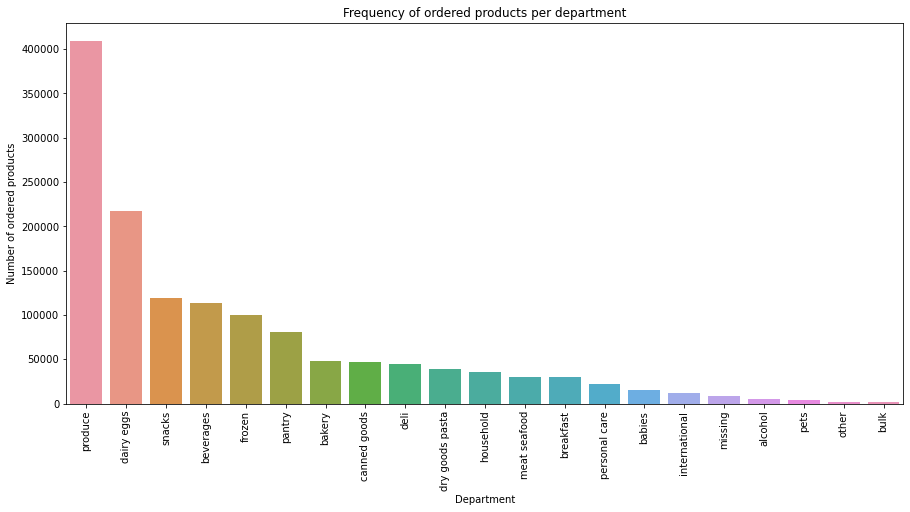

In [46]:
cnt_depts = sales_df.department.value_counts()

plt.figure(figsize=(15,7))
sns.barplot(x=cnt_depts.index, y=cnt_depts.values)
plt.xlabel('Department')
plt.ylabel('Number of ordered products')
plt.title('Frequency of ordered products per department')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top 20 most commonly ordered products

In [47]:
top_ordered = sales_df['product_name'].value_counts().head(20)
top_ordered

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Organic Garlic             4158
Seedless Red Grapes        4059
Asparagus                  3868
Organic Grape Tomatoes     3823
Organic Red Onion          3818
Name: product_name, dtype: int64

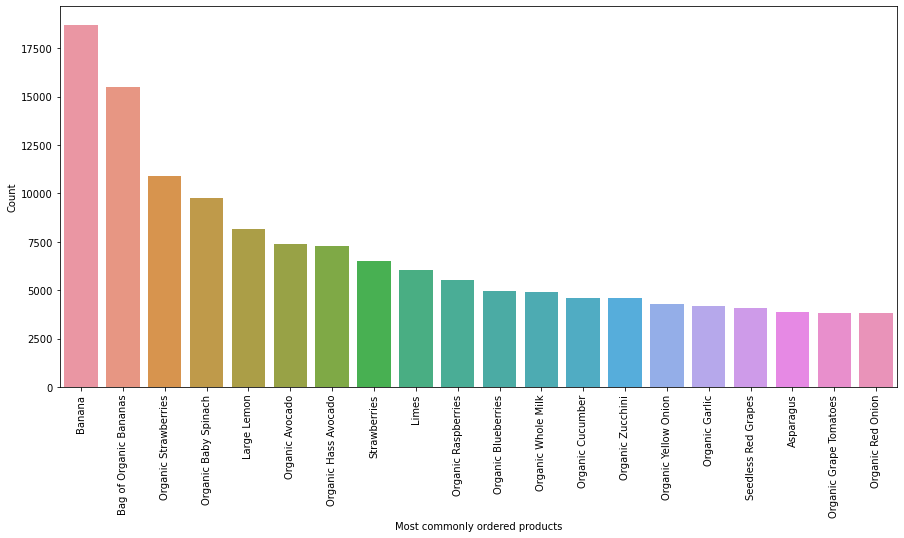

In [48]:
# let's visualize the most commonly ordered products
plt.figure(figsize=(15,7))
sns.barplot(x=top_ordered.index, y=top_ordered.values)
plt.xlabel('Most commonly ordered products')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top departments from which products are ordered

In [49]:
top_ordered_depts = sales_df['department'].value_counts().head(20)
top_ordered_depts

produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
Name: department, dtype: int64

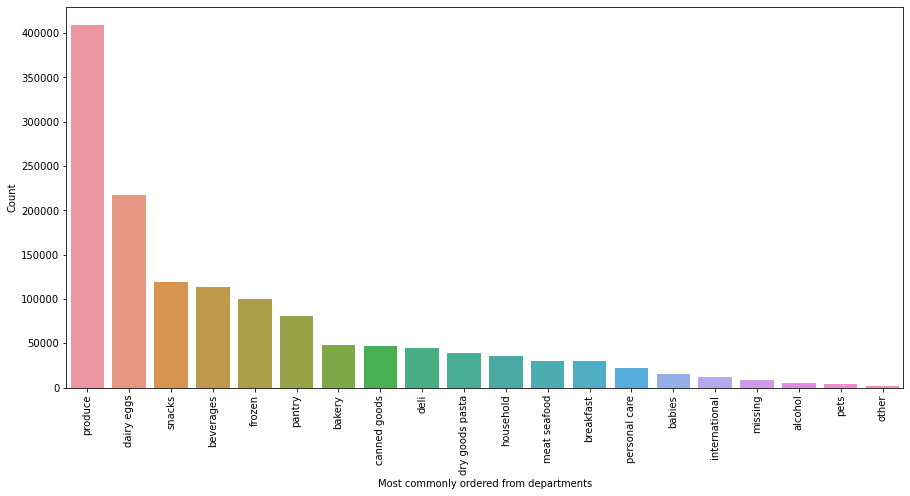

In [50]:
# let's visualize the departments from which products are most commonly ordered
plt.figure(figsize=(15,7))
sns.barplot(x=top_ordered_depts.index, y=top_ordered_depts.values)
plt.xlabel('Most commonly ordered from departments')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top aisles from which products are ordered

In [51]:
top_ordered_aisles = sales_df['aisle'].value_counts().head(20)
top_ordered_aisles

fresh vegetables                 150609
fresh fruits                     150473
packaged vegetables fruits        78493
yogurt                            55240
packaged cheese                   41699
water seltzer sparkling water     36617
milk                              32644
chips pretzels                    31269
soy lactosefree                   26240
bread                             23635
refrigerated                      23228
ice cream ice                     22676
frozen produce                    22453
eggs                              19875
crackers                          19592
frozen meals                      18221
energy granola bars               17449
lunch meat                        16957
soft drinks                       16279
cereal                            16201
Name: aisle, dtype: int64

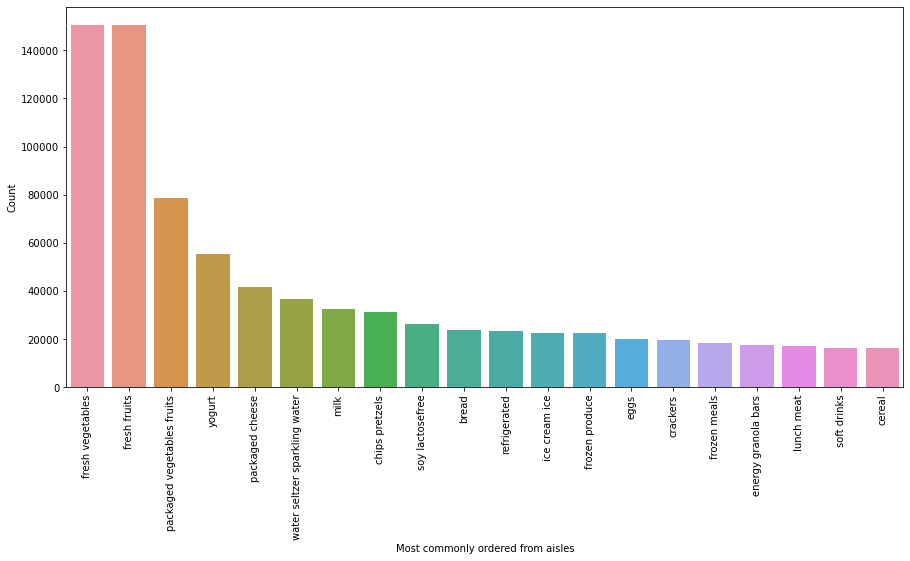

In [52]:
# let's visualize the aisles from which products are most commonly ordered
plt.figure(figsize=(15,7))
sns.barplot(x=top_ordered_aisles.index, y=top_ordered_aisles.values)
plt.xlabel('Most commonly ordered from aisles')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top 10 products added to cart

In [53]:
top_cart = sales_df.nlargest(n=10, columns=['add_to_cart_order'])

# Dropping off the other irrelevant columns
top_cart.drop(['user_id','order_number','order_day','order_hour_of_day','days_since_prior_order','product_id','department_id', 
               'aisle_id','order_id','product_reorder_rate','user_reorder_rate','reordered'], axis=1, inplace=True)
top_cart = top_cart.reset_index(drop=True)
top_cart

,product_name,department,aisle,add_to_cart_order
0,Mixed Nuts Lightly Salted,snacks,nuts seeds dried fruit,80
1,Fresh European Style Baby Spinach,produce,packaged vegetables fruits,80
2,Organic Avocado,produce,fresh fruits,79
3,Aged White Cheddar Puffs Cheese Snacks,snacks,popcorn jerky,79
4,Organic Baby Bella Mushrooms,produce,packaged vegetables fruits,78
5,Raisin Bran Cereal,breakfast,cereal,78
6,Half & Half,dairy eggs,cream,77
7,Done Baby Wipes Cumber & Green Tea,babies,diapers wipes,77
8,Asparation/Broccolini/Baby Broccoli,produce,fresh vegetables,77
9,Fragrance Free Natural Care Wipes,babies,diapers wipes,76


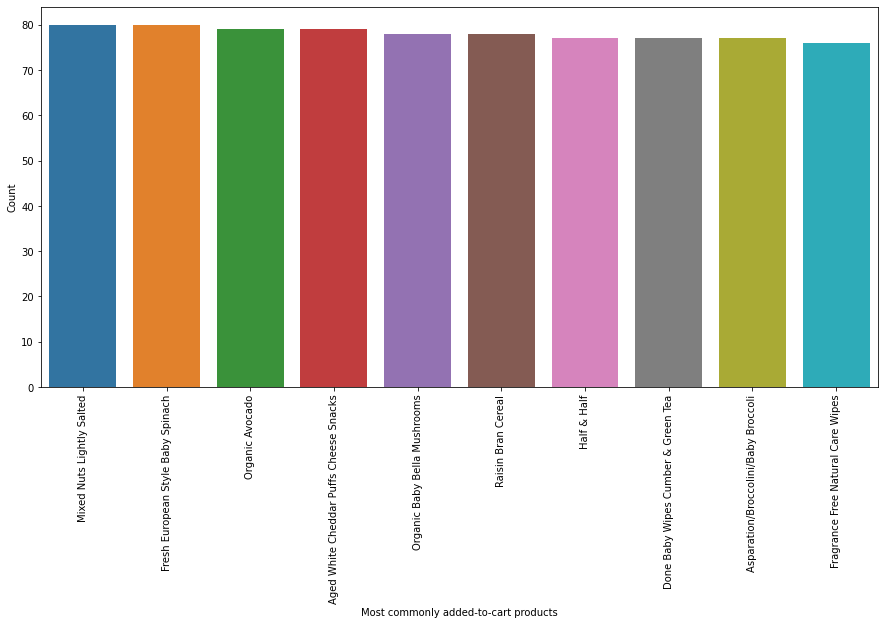

In [54]:
# let's visualize the top add-to-cart products
plt.figure(figsize=(15,7))
sns.barplot(x=top_cart['product_name'], y=top_cart['add_to_cart_order'])
plt.xlabel('Most commonly added-to-cart products')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top departments from which products are added-to-cart

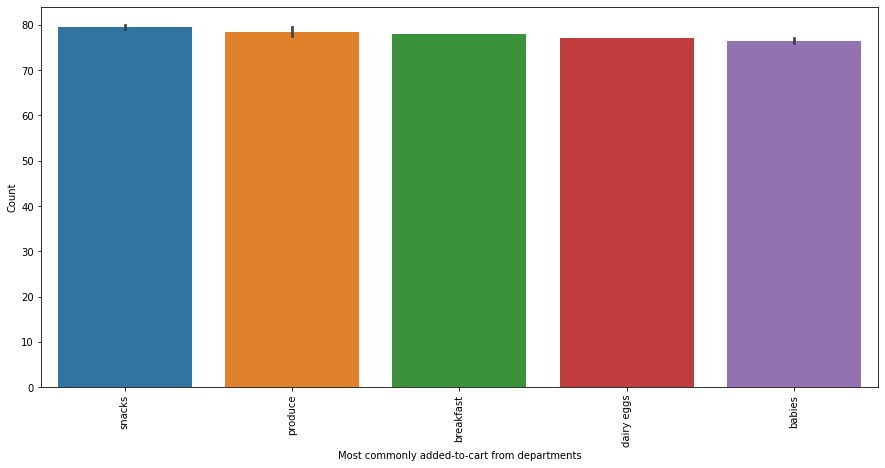

In [55]:
# let's visualize the top add-to-cart departments
plt.figure(figsize=(15,7))
sns.barplot(x=top_cart['department'], y=top_cart['add_to_cart_order'])
plt.xlabel('Most commonly added-to-cart from departments')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top aisles from which products are added-to-cart 

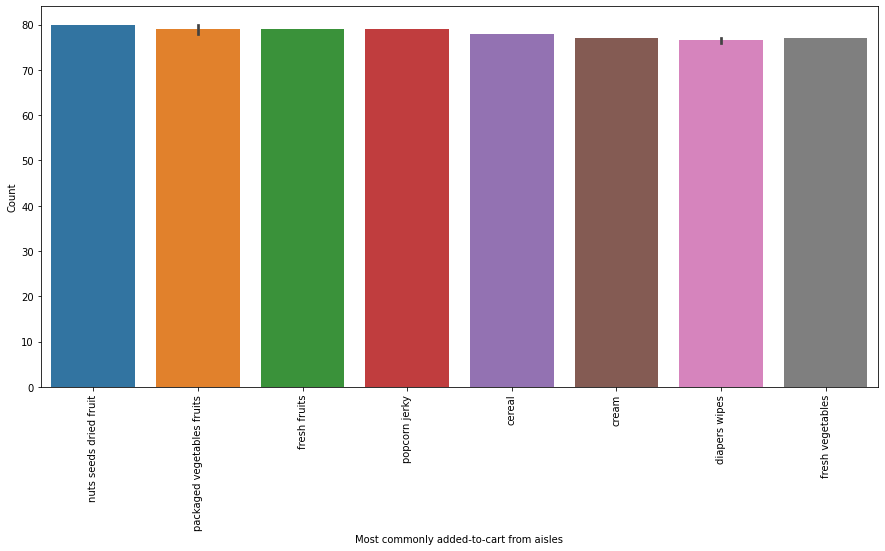

In [56]:
# let's visualize the top add-to-cart aisles
plt.figure(figsize=(15,7))
sns.barplot(x=top_cart['aisle'], y=top_cart['add_to_cart_order'])
plt.xlabel('Most commonly added-to-cart from aisles')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top 20 most frequently bought products (less gap in between)

In [57]:
# Top 20 most frequently bought products
most_frequent = sales_df[(sales_df['days_since_prior_order'] == 0)]
most_frequent = most_frequent['product_name'].value_counts().head(20)
most_frequent

Banana                    202
Bag of Organic Bananas    176
Organic Strawberries      138
Organic Baby Spinach       98
Limes                      82
Large Lemon                76
Organic Avocado            67
Organic Garlic             64
Strawberries               63
Organic Raspberries        63
Organic Cucumber           61
Organic Hass Avocado       58
Organic Whole Milk         57
Organic Blueberries        54
Organic Zucchini           51
Seedless Red Grapes        50
Organic Cilantro           49
Spring Water               44
Organic Tomato Cluster     44
Organic Blackberries       44
Name: product_name, dtype: int64

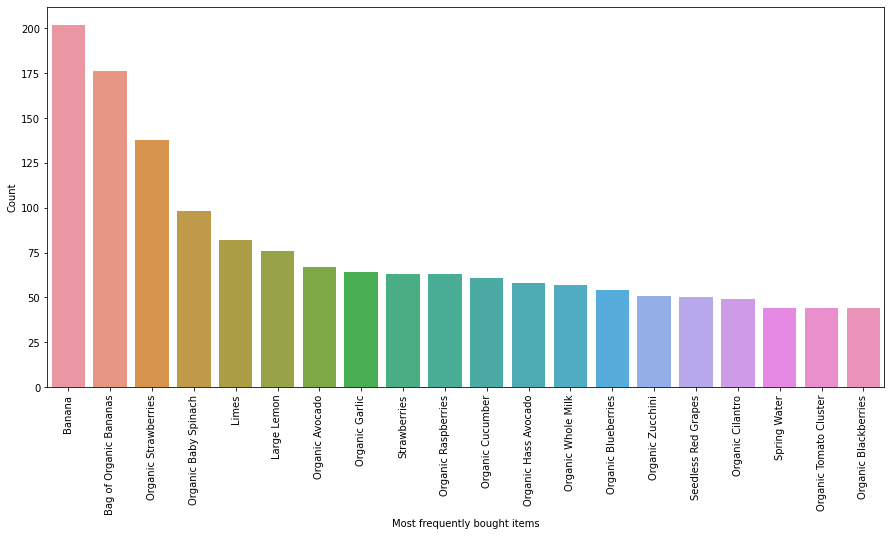

In [58]:
# Let's visualize the 20 most frequently bought products
plt.figure(figsize=(15,7))
sns.barplot(most_frequent.index, most_frequent.values)
plt.ylabel('Count')
plt.xlabel('Most frequently bought items')
plt.xticks(rotation='vertical')
plt.show()

###### Get the top most frequently bought from departments

In [59]:
# Top 20 most frequently bought from departments
most_frequent_depts = sales_df[(sales_df['days_since_prior_order'] == 0)]
most_frequent_depts = most_frequent_depts['department'].value_counts().head(20)
most_frequent_depts

produce            4822
dairy eggs         2518
beverages          1670
snacks             1669
frozen             1153
pantry             1137
bakery              566
deli                507
canned goods        504
household           496
dry goods pasta     391
breakfast           372
meat seafood        370
personal care       263
babies              142
international       137
missing             110
alcohol             109
pets                 47
other                41
Name: department, dtype: int64

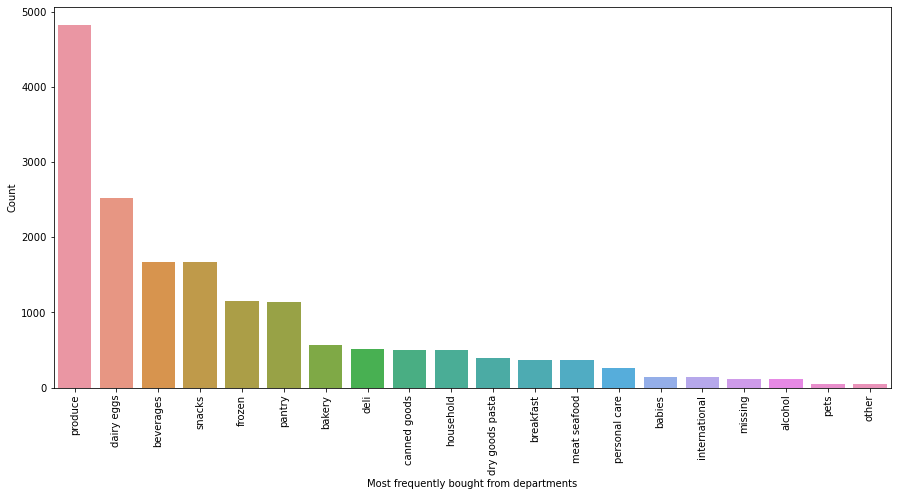

In [60]:
# Let's visualize the top most frequently bought from departments (with 0 days in between)
plt.figure(figsize=(15,7))
sns.barplot(most_frequent_depts.index, most_frequent_depts.values)
plt.ylabel('Count')
plt.xlabel('Most frequently bought from departments')
plt.xticks(rotation='vertical')
plt.show()

###### Get the top most frequently bought from aisles

In [61]:
# Top 20 most frequently bought from aisles
most_frequent_aisles = sales_df[(sales_df['days_since_prior_order'] == 0)]
most_frequent_aisles = most_frequent_aisles['aisle'].value_counts().head(20)
most_frequent_aisles

fresh fruits                     1783
fresh vegetables                 1727
packaged vegetables fruits        867
yogurt                            639
water seltzer sparkling water     518
packaged cheese                   462
milk                              394
chips pretzels                    374
refrigerated                      314
ice cream ice                     311
soy lactosefree                   305
energy granola bars               275
frozen produce                    266
bread                             251
soft drinks                       244
packaged produce                  232
crackers                          228
eggs                              218
fresh herbs                       213
juice nectars                     208
Name: aisle, dtype: int64

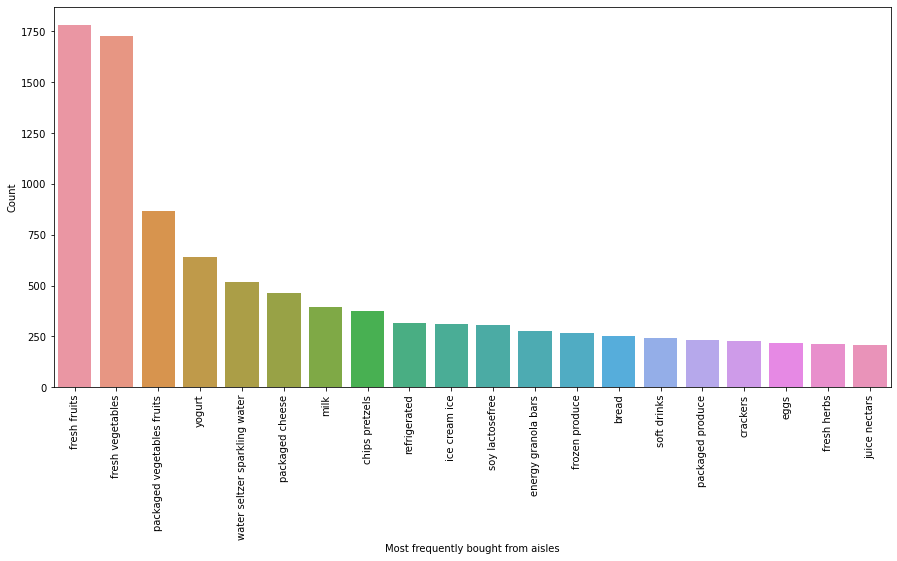

In [62]:
# Let's visualize the top most frequently bought from aisles (with 0 days in between)
plt.figure(figsize=(15,7))
sns.barplot(most_frequent_aisles.index, most_frequent_aisles.values)
plt.ylabel('Count')
plt.xlabel('Most frequently bought from aisles')
plt.xticks(rotation='vertical')
plt.show()

##### Get the top 20 most bought products on 'weekends'

In [63]:
# Top 20 most bought products on 'weekends'
weeknd_sale = sales_df[(sales_df['order_day'] == 0) | (sales_df['order_day'] == 1)]
weeknd_sale = weeknd_sale['product_name'].value_counts().head(20)
weeknd_sale

Banana                    7668
Bag of Organic Bananas    6039
Organic Strawberries      4340
Organic Baby Spinach      4184
Large Lemon               3377
Organic Avocado           3197
Organic Hass Avocado      2995
Strawberries              2577
Limes                     2429
Organic Raspberries       2166
Organic Zucchini          2077
Organic Blueberries       1961
Organic Cucumber          1942
Organic Whole Milk        1880
Organic Yellow Onion      1845
Organic Garlic            1729
Asparagus                 1696
Organic Grape Tomatoes    1679
Seedless Red Grapes       1643
Yellow Onions             1629
Name: product_name, dtype: int64

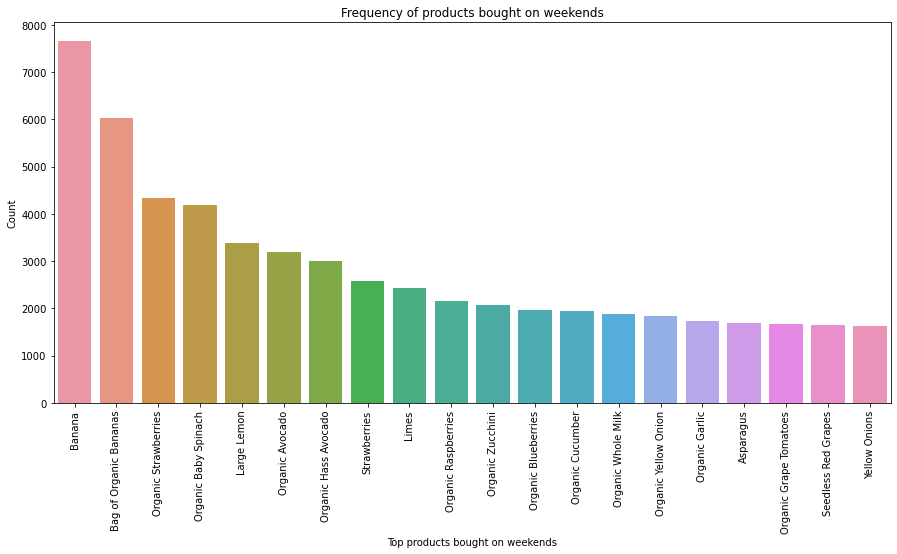

In [64]:
# Let's visualize the top 20 most bought products on 'weekends'
plt.figure(figsize=(15,7))
sns.barplot(weeknd_sale.index, weeknd_sale.values)
plt.ylabel('Count')
plt.xlabel('Top products bought on weekends')
plt.title("Frequency of products bought on weekends")
plt.xticks(rotation='vertical')
plt.show()

##### Get the top departments from which products are ordered on 'weekends'

In [65]:
# Top 20 most bought from departments on 'weekends'
weeknd_sale_depts = sales_df[(sales_df['order_day'] == 0) | (sales_df['order_day'] == 1)]
weeknd_sale_depts = weeknd_sale_depts['department'].value_counts().head(20)
weeknd_sale_depts

produce            165973
dairy eggs          83206
snacks              43168
beverages           39681
frozen              37136
pantry              29900
canned goods        18671
bakery              18351
deli                17448
dry goods pasta     15324
household           12532
meat seafood        12160
breakfast           11216
personal care        7730
babies               5672
international        4754
missing              3106
pets                 1525
alcohol              1328
other                 629
Name: department, dtype: int64

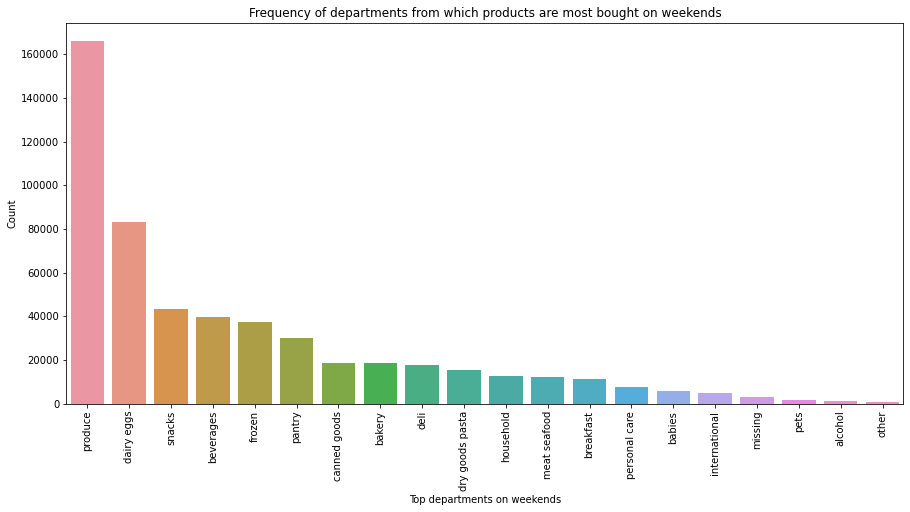

In [66]:
# Let's visualize the top departments from which products are most bought on 'weekends'
plt.figure(figsize=(15,7))
sns.barplot(weeknd_sale_depts.index, weeknd_sale_depts.values)
plt.ylabel('Count')
plt.xlabel('Top departments on weekends')
plt.title("Frequency of departments from which products are most bought on weekends")
plt.xticks(rotation='vertical')
plt.show()

##### Get the top aisles from which products are ordered on 'weekends'

In [67]:
# Top 20 most bought from aisles on 'weekends'
weeknd_sale_aisles = sales_df[(sales_df['order_day'] == 0) | (sales_df['order_day'] == 1)]
weeknd_sale_aisles = weeknd_sale_aisles['aisle'].value_counts().head(20)
weeknd_sale_aisles

fresh vegetables                 62577
fresh fruits                     60099
packaged vegetables fruits       32193
yogurt                           22082
packaged cheese                  16147
water seltzer sparkling water    13074
milk                             12289
chips pretzels                   11171
soy lactosefree                   9963
bread                             9019
frozen produce                    8814
refrigerated                      8275
eggs                              7820
ice cream ice                     7598
crackers                          7133
energy granola bars               6918
frozen meals                      6841
lunch meat                        6812
fresh herbs                       6311
cereal                            6162
Name: aisle, dtype: int64

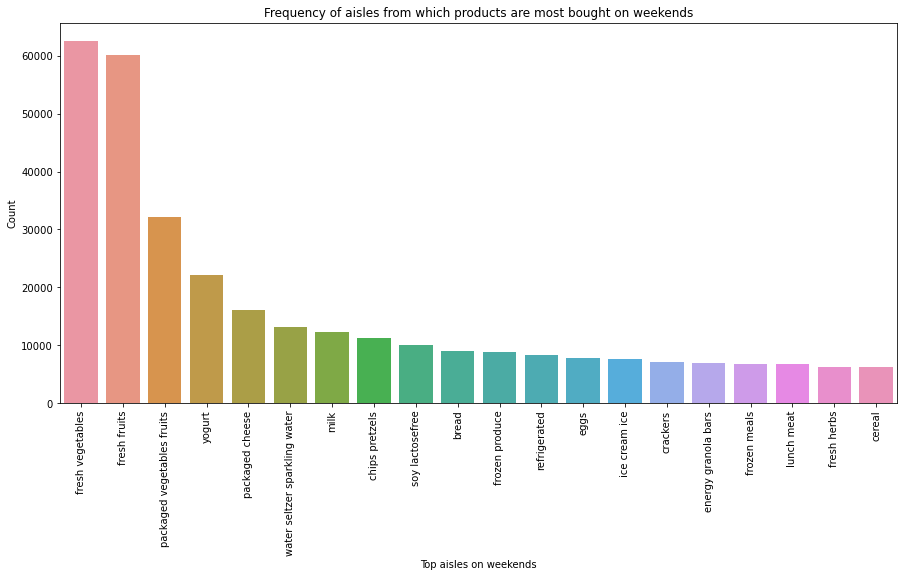

In [68]:
# Let's visualize the top aisles from which products are most bought on 'weekends'
plt.figure(figsize=(15,7))
sns.barplot(weeknd_sale_aisles.index, weeknd_sale_aisles.values)
plt.ylabel('Count')
plt.xlabel('Top aisles on weekends')
plt.title("Frequency of aisles from which products are most bought on weekends")
plt.xticks(rotation='vertical')
plt.show()

#### Analyzing the 'target' column

In [69]:
# 0.598594% of products were re-ordered
reorder = sales_df.reordered.value_counts()

print('Percentage of reordered products:')
print(reorder / sum(reorder))

Percentage of reordered products:
1    0.598594
0    0.401406
Name: reordered, dtype: float64


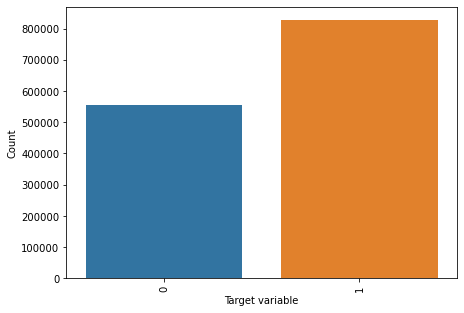

In [70]:
# Let’s check how well our target column is balanced
plt.figure(figsize=(7,5))
sns.barplot(x=reorder.index, y=reorder.values)
plt.xlabel('Target variable')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

#### Pre-processing the final dataset

In [71]:
# check for categorical columns
cat_col = []
for x in sales_df.dtypes.index:
    if sales_df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['product_name', 'department', 'aisle']

In [72]:
# Dropping off the other irrelevant columns
# Since 'product_name' & 'department' is already mapped to their id's, we can safely drop these columns
sales_df.drop(['order_id', 'order_number', 'product_name', 'department', 'aisle'], axis=1, inplace=True)
print(sales_df.shape)
sales_df.head(5)

(1384617, 11)


,user_id,product_id,product_reorder_rate,department_id,aisle_id,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,user_reorder_rate,reordered
0,1540,1,0.644737,19,61,1,1,8,7,1.0,1
1,1540,130,0.680000,1,37,1,1,8,14,1.0,1
2,1540,3298,0.731707,16,21,1,1,8,13,1.0,1
3,1540,6184,0.743153,4,32,1,1,8,19,1.0,1
4,1540,9007,0.608696,14,121,1,1,8,9,1.0,1


#### Correlation Matrix

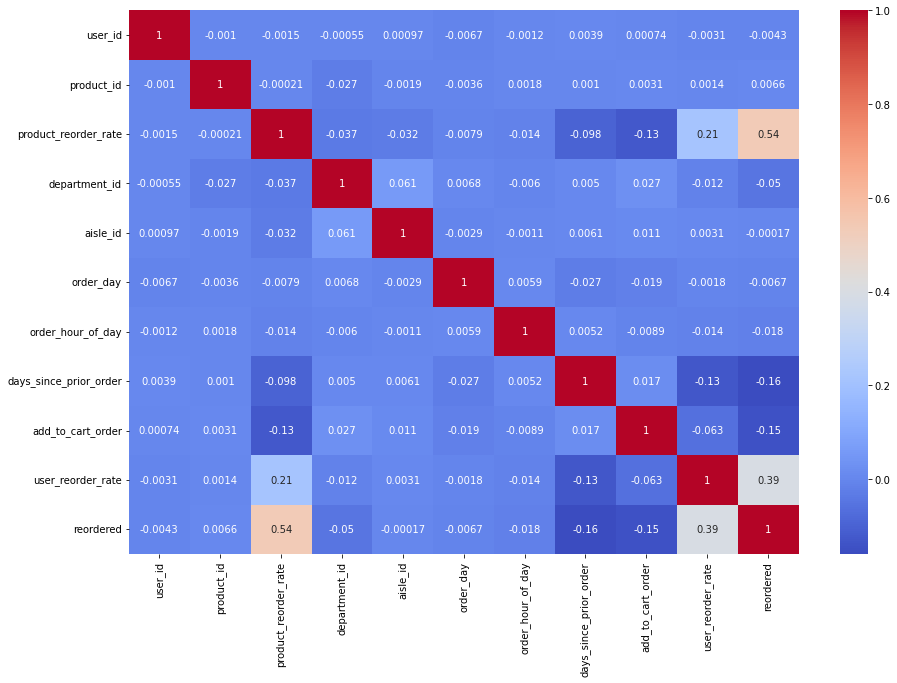

In [73]:
# Correlation among all the numeric variables
plt.figure(figsize=(15,10))
sns.heatmap(sales_df.corr(), annot=True, cmap = "coolwarm")
plt.show()

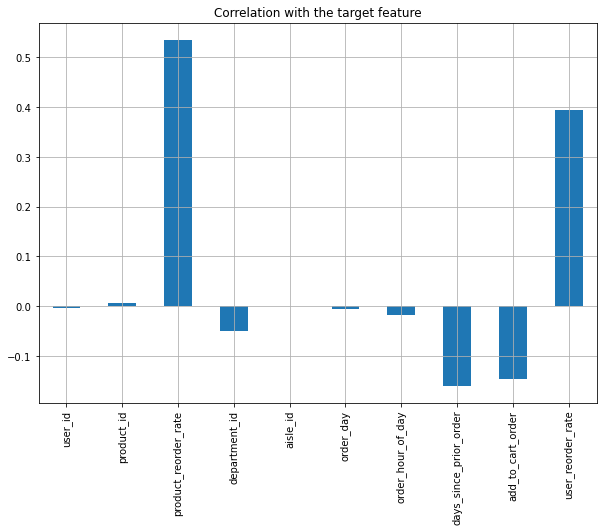

In [74]:
sales_df.drop('reordered', axis=1).corrwith(sales_df['reordered']).plot(kind='bar', grid=True, figsize=(10, 7),
                                                            title="Correlation with the target feature")
plt.show()

### Building our Model

In [75]:
# Define the 'features' and 'labels'
X = sales_df.drop('reordered', axis='columns')
y = sales_df['reordered']

In [76]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(969231, 10)
(969231,)
(415386, 10)
(415386,)


In [78]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training set
log_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_model.predict(X_test)

In [80]:
# evaluating our model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118803  48350]
 [ 33922 214311]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74    167153
           1       0.82      0.86      0.84    248233

    accuracy                           0.80    415386
   macro avg       0.80      0.79      0.79    415386
weighted avg       0.80      0.80      0.80    415386



In [81]:
from sklearn.metrics import accuracy_score

log_score = accuracy_score(y_test, y_pred)*100
print("Accuracy score: ", log_score)

Accuracy score:  80.19384379829845


In [82]:
# Calculate the log loss -> lower loss scores are better
from sklearn.metrics import log_loss

clf_probs = log_model.predict_proba(X_test)
lr_log_score = log_loss(y_test, clf_probs)
print(lr_log_score)

0.4436786884000896


### Random Forest Classifier (RFC)

In [83]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = rfc.predict(X_test)

In [84]:
# evaluating our RFC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[153133  14020]
 [ 13572 234661]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    167153
           1       0.94      0.95      0.94    248233

    accuracy                           0.93    415386
   macro avg       0.93      0.93      0.93    415386
weighted avg       0.93      0.93      0.93    415386



In [85]:
from sklearn.metrics import accuracy_score

rfc_score = accuracy_score(y_test, y_pred1)*100
print("Accuracy score: ", rfc_score)

Accuracy score:  93.35750362313607


In [86]:
# Calculate the log loss -> lower loss scores are better
from sklearn.metrics import log_loss

clf_probs = rfc.predict_proba(X_test)
rfc_log_score = log_loss(y_test, clf_probs)
print(rfc_log_score)

0.18238617998231632


### XGBoost Classifier

In [87]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

xgb_clf = XGBClassifier(max_depth=3)

# Train the model on the training set
xgb_clf.fit(X_train, y_train)

print(xgb_clf.get_xgb_params())

# Make predictions on the testing set
y_pred2 = xgb_clf.predict(X_test)

[16:48:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [88]:
from sklearn.metrics import accuracy_score

xgb_clf_score = accuracy_score(y_test, y_pred2)*100
print("Accuracy score: ", xgb_clf_score)

Accuracy score:  87.22778331479635


##### Hyperparameter tuning in XGBoost Classifier

In [89]:
# Hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'max_depth': [5, 6, 7, 8, 9, 10],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1.0],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'min_child_weight': [0.1, 0.2, 0.3, 0.5, 1],
        'gamma': [0, 0.25, 0.5, 1],
        'n_estimators': [100, 200, 300, 500, 1000]}

fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]}

In [90]:
clf = xgb.XGBClassifier()

clf_cv = RandomizedSearchCV(clf, param_grid, verbose=2, n_jobs=-1, scoring='neg_log_loss', cv=2)

# Train the model on the training set
clf_cv.fit(X_train, y_train, **fit_params)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[0]	validation_0-logloss:0.63737
[1]	validation_0-logloss:0.59591
[2]	validation_0-logloss:0.57573
[3]	validation_0-logloss:0.53789
[4]	validation_0-logloss:0.50589
[5]	validation_0-logloss:0.47863
[6]	validation_0-logloss:0.45570
[7]	validation_0-logloss:0.43543
[8]	validation_0-logloss:0.41581
[9]	validation_0-logloss:0.39999
[10]	validation_0-logloss:0.38798
[11]	validation_0-logloss:0.37509
[12]	validation_0-logloss:0.36359
[13]	validation_0-logloss:0.35344
[14]	validation_0-logloss:0.34329
[15]	validation_0-logloss:0.33434
[16]	validation_0-logloss:0.32815
[17]	validation_0-logloss:0.32097
[18]	validation_0-logloss:0.31544
[19]	validation_0-logloss:0.31023
[20]	validation_0-logloss:0.30498
[21]	validation_0-logloss:0.30073
[22]	validation_0-logloss:0.29723
[23]	validation_0-logloss:0.29320
[24]	validation_0-logloss:0.29030
[25]	validation_0-logloss:0.28740
[26]	validation_0-logloss:0.28357
[27]	validation_0-logloss:0.281

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9, 1],
                            

In [91]:
best_score = clf_cv.best_score_
best_params = clf_cv.best_params_

print("Best score: {}".format(best_score))
print("Best parameters: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.1566993269957277
Best parameters: 
colsample_bylevel: 1
colsample_bytree: 0.9
gamma: 0.25
learning_rate: 0.1
max_depth: 8
min_child_weight: 0.3
n_estimators: 500
subsample: 0.5


##### XGBoost with optimal hyperparameters

In [94]:
# XGBoost with optimal hyperparameters
clf = xgb.XGBClassifier(gamma=0.25, learning_rate=0.1, max_depth=8, n_estimators=1000, subsample=0.5,
                        colsample_bylevel=1, colsample_bytree=0.9, min_child_weight=0.3) 

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = clf.predict(X_test)

[17:33:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
from sklearn.metrics import accuracy_score

xgb_score = accuracy_score(y_test, y_pred3)*100
print("Accuracy score: ", xgb_score)

Accuracy score:  96.53262266903555


In [96]:
from sklearn.metrics import log_loss
clf_probs = clf.predict_proba(X_test)
xgb_log_score = log_loss(y_test, clf_probs)
print(xgb_log_score)

0.10507133610442926


### LightGBM Classifier

In [97]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(n_estimators=20)

# Train the model on the training set
lgb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred4 = lgb_clf.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

lgb_clf_score = accuracy_score(y_test, y_pred3)*100
print("Accuracy score: ", lgb_clf_score)

Accuracy score:  96.53262266903555


##### Hyperparameter tuning in LightGBM Classifier

In [99]:
# Hyperparameter tuning
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

search_params = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'learning_rate': [0.01, 0.10, 0.125, 0.15, 0.175, 0.2, 0.5, 1.0],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'num_leaves': [20, 30, 40, 50, 60, 70],
        'n_estimators': [x for x in range(20, 150, 2)]}

In [100]:
estimator = lgb.LGBMClassifier()

grid = RandomizedSearchCV(estimator, search_params, verbose=2, n_jobs=-1, cv=2)

# Train the model on the training set
grid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.125,
                                                          0.15, 0.175, 0.2, 0.5,
                                                          1.0],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [20, 22, 24, 26, 28, 30,
                                                         32, 34, 36, 38, 40, 42,
                                                         44, 46, 48, 50, 52, 54,
                                                         56, 58, 60, 62, 64, 66,
                                                         68, 70, 72, 74, 76, 78, ...],
                                        'num_leaves': [20, 30, 40, 50, 60, 70],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
    

In [101]:
best_score = grid.best_score_
best_params = grid.best_params_

print("Best score: {}".format(best_score))
print("Best parameters: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9342313637637212
Best parameters: 
learning_rate: 0.5
max_depth: 9
n_estimators: 96
num_leaves: 50
subsample: 1.0


##### LightGBM Classifier with optimal hyperparameters

In [102]:
# LightGBM with optimal hyperparameters
estimator = lgb.LGBMClassifier(learning_rate=0.5, max_depth=8, n_estimators=124, num_leaves=70, subsample=0.7) 

# Train the model on the training set
estimator.fit(X_train, y_train)

# Make predictions on the testing set
y_pred5 = estimator.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

lgb_score = accuracy_score(y_test, y_pred5)*100
print("Accuracy score: ", lgb_score)

Accuracy score:  94.87898003302952


In [104]:
from sklearn.metrics import log_loss
clf_probs = lgb_clf.predict_proba(X_test)
lgb_log_score = log_loss(y_test, clf_probs)
print(lgb_log_score)

0.33295823843303485


In [105]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier', 'LightGBM Classifier'],
    'Accuracy': [log_score, rfc_score, xgb_score, lgb_score],
    'Log Loss': [lr_log_score, rfc_log_score, xgb_log_score, lgb_log_score]
})

result_df = results.sort_values(by=['Accuracy','Log Loss'], ascending=[False,True])
result_df

,Model,Accuracy,Log Loss
2,XGBoost Classifier,96.532623,0.105071
3,LightGBM Classifier,94.878980,0.332958
1,Random Forest Classifier,93.357504,0.182386
0,Logistic Regression,80.193844,0.443679


### Feature Importances in Random Forest Classifier model

In [106]:
# get importance
importance = pd.DataFrame({
    'Feature': sales_df.drop('reordered', axis=1).columns,
    'Importance': rfc.feature_importances_
})

importance = importance.sort_values(by='Importance', ascending=False)
importance = importance.set_index('Feature')
importance

,Importance
Feature,
product_reorder_rate,0.399690
user_reorder_rate,0.168659
department_id,0.097900
product_id,0.079891
aisle_id,0.077110
days_since_prior_order,0.046545
user_id,0.043902
add_to_cart_order,0.039389
order_hour_of_day,0.028370


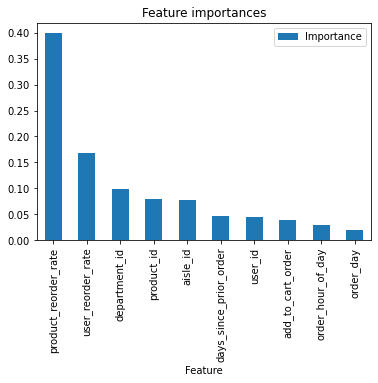

In [107]:
# Plot feature importance
importance.plot.bar()
plt.title("Feature importances")
plt.show()

### Making predictions

In [108]:
X.columns

Index(['user_id', 'product_id', 'product_reorder_rate', 'department_id',
       'aisle_id', 'order_day', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'user_reorder_rate'],
      dtype='object')

In [109]:
def predict(product_id, department_id, aisle_id, days_since_prior_order, add_to_cart_order):
    x = np.zeros(len(X.columns))
    x[1] = product_id
    x[3] = department_id
    x[4] = aisle_id
    x[7] = days_since_prior_order
    x[8] = add_to_cart_order
    
    return clf.predict([x])[0]

In [110]:
predict(2, 1, 1, 7, 2)

1

In [111]:
# Finally, after loading that model we will use this to make predictions
prediction = clf.predict(X_test)

In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df.tail(10)

,Actual,Predicted
928213,0,0
732292,0,0
1001402,1,1
216147,1,1
190745,1,1
99966,1,1
70355,1,1
509972,1,1
154659,1,1
391491,1,1


In [113]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [114]:
X["reordered"] = final_df

In [115]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\predictions.csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


#### Get the prediction probabilities for each class

In [116]:
pred1 = rfc.predict_proba(X_test)
pred2 = clf.predict_proba(X_test)
pred3 = estimator.predict_proba(X_test)

final_pred = (pred1+pred2+pred3)/3

In [117]:
prob_df = pd.DataFrame(final_pred, columns=['0','1'])
prob_df

,0,1
0,0.999273,0.000727
1,0.581741,0.418259
2,0.003335,0.996665
3,0.984556,0.015444
4,0.111406,0.888594
...,...,...
415381,0.006863,0.993137
415382,0.158772,0.841228
415383,0.000729,0.999271
415384,0.147824,0.852176


In [118]:
final_df1 = prob_df['1']
final_df1 = prob_df.drop('0',axis=1)

In [119]:
X["reordered"] = final_df1

In [120]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Instacart analyis\prediction_probabilities.csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!
